In [1]:
import os
from PIL import Image
from sahi.model import MmdetDetectionModel
from sahi.predict import get_prediction, get_sliced_prediction, predict
from sahi.utils.cv import visualize_object_predictions
import numpy as np
import pickle
from collections import defaultdict
import pandas as pd

/vol/bitbucket/jrb21/anaconda3/envs/sodb/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load the model

In [2]:
detection_model = MmdetDetectionModel(
    model_path= "models-to-test/latest.pth",
    config_path= "mmdet_configs/xview_tood/tood_crop_300_500_cls_cars_trucks_1e-3_new_pipe.py",
    device='cuda' # or 'cpu'
)

load checkpoint from local path: models-to-test/latest.pth


### Run inference on a single image

In [3]:
test_img_path = "WV3/out_red.tiff"
width, height = (400,400)

sliced_pred_result = get_sliced_prediction(
    test_img_path,
    detection_model, 
    slice_width=width, 
    slice_height=height
)

Performing prediction on 115 number of slices.


In [4]:
sliced_pred_result.object_prediction_list

[ObjectPrediction<
     bbox: BoundingBox: <(666, 6302, 676, 6319), w: 10, h: 17>,
     mask: None,
     score: PredictionScore: <value: 0.5692824721336365>,
     category: Category: <id: 0, name: Small Car>>,
 ObjectPrediction<
     bbox: BoundingBox: <(680, 6687, 689, 6702), w: 9, h: 15>,
     mask: None,
     score: PredictionScore: <value: 0.5174318552017212>,
     category: Category: <id: 0, name: Small Car>>,
 ObjectPrediction<
     bbox: BoundingBox: <(649, 3191, 658, 3207), w: 9, h: 16>,
     mask: None,
     score: PredictionScore: <value: 0.5075268149375916>,
     category: Category: <id: 0, name: Small Car>>,
 ObjectPrediction<
     bbox: BoundingBox: <(505, 4882, 515, 4898), w: 10, h: 16>,
     mask: None,
     score: PredictionScore: <value: 0.5052633881568909>,
     category: Category: <id: 0, name: Small Car>>,
 ObjectPrediction<
     bbox: BoundingBox: <(489, 5068, 498, 5085), w: 9, h: 17>,
     mask: None,
     score: PredictionScore: <value: 0.500849723815918>,
     c

### Batch prediction

In [4]:
MODEL_PATH = "models-to-test/latest.pth"
MODEL_CONFIG_PATH = config_path= "mmdet_configs/xview_tood/tood_crop_300_500_cls_cars_trucks_1e-3_new_pipe.py"
EVAL_IMAGES_FOLDER_DIR = "WV3"
EXPORT_VISUAL = True

INFERENCE_SETTING_TO_PARAMS = {
    "XVIEW_SAHI": {
        "no_standard_prediction": True,
        "no_sliced_prediction": False,
        "slice_size": 400,
        "overlap_ratio": 0,
    },
    "XVIEW_SAHI_PO": {
        "no_standard_prediction": True,
        "no_sliced_prediction": False,
        "slice_size": 400,
        "overlap_ratio": 0.20,
    },
    "XVIEW_SAHI_FI": {
        "no_standard_prediction": False,
        "no_sliced_prediction": False,
        "slice_size": 400,
        "overlap_ratio": 0,
    },
    "XVIEW_SAHI_FI_PO": {
        "no_standard_prediction": False,
        "no_sliced_prediction": False,
        "slice_size": 400,
        "overlap_ratio": 0.20,
    },
}

# Of the above 4 options I want to slice and not do full image size inference
INFERENCE_SETTING = "XVIEW_SAHI_PO"
setting_params = INFERENCE_SETTING_TO_PARAMS[INFERENCE_SETTING]

# From the evaluation py file I delete the eval dataset path and change the confidence to 0.3
result = predict(
    model_type="mmdet",
    model_path=MODEL_PATH,
    model_config_path=MODEL_CONFIG_PATH,
    model_confidence_threshold=0.2,
    model_device="cuda:0",
    model_category_mapping=None,
    model_category_remapping=None,
    source=EVAL_IMAGES_FOLDER_DIR,
    no_standard_prediction=setting_params["no_standard_prediction"],
    no_sliced_prediction=setting_params["no_sliced_prediction"],
    image_size=None,
    slice_height=setting_params["slice_size"],
    slice_width=setting_params["slice_size"],
    overlap_height_ratio=setting_params["overlap_ratio"],
    overlap_width_ratio=setting_params["overlap_ratio"],
    postprocess_type="GREEDYNMM",
    postprocess_match_metric="IOS",
    postprocess_match_threshold=0.5,
    postprocess_class_agnostic=True,
    novisual=not EXPORT_VISUAL,
    project="runs/highways",
    name=INFERENCE_SETTING,
    visual_bbox_thickness=1,
    visual_text_size=0.3,
    visual_text_thickness=1,
    visual_export_format="png",
    verbose=0,
    return_dict=True,
    force_postprocess_type=True,
    export_pickle = True,
)

load checkpoint from local path: models-to-test/latest.pth


Performing inference on images:   0%|                                                                                                 | 0/4 [00:00<?, ?it/s]/vol/bitbucket/jrb21/anaconda3/envs/sodb/lib/python3.8/site-packages/sahi/postprocess/utils.py:145: RuntimeWarning: invalid value encountered in long_scalars
  return intersect / smaller_area
Performing inference on images:   0%|                                                                                                 | 0/4 [00:05<?, ?it/s]

Prediction time is: 5466.97 ms


Performing inference on images:  25%|██████████████████████▎                                                                  | 1/4 [00:25<00:17,  5.79s/it]

Prediction time is: 19958.99 ms


Performing inference on images:  50%|████████████████████████████████████████████▌                                            | 2/4 [00:34<00:29, 14.65s/it]

Prediction time is: 7366.42 ms


Performing inference on images:  75%|██████████████████████████████████████████████████████████████████▊                      | 3/4 [00:50<00:11, 11.45s/it]

Prediction time is: 16112.48 ms


Performing inference on images: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:50<00:00, 12.72s/it]

Prediction results are successfully exported to runs/highways/XVIEW_SAHI_PO11


### Process inference results

In [2]:
# Initially set the column names so they agree with the names in the pickle files
detections = pd.DataFrame(
   {
       "road": [],
       "small_car_detections": [],
       "bus_detections": [],
       "pickup_truck_detections": [],
       "utility_truck_detections": [],
       "truck_detections": [],
       "cargo_truck_detections": [],
       "truck_w_box_detections": [],
       "truck_tractor_detections": [],
       "trailer_detections": [],
       "truck_w_flatbed_detections": [],
       "truck_w_liquid_detections": [],
       "all_vehicle_detections": [],
       "length_m": [],
       
   }
)

# We need the roadlengths to calculate time to cross
road_lengths = {'A45':4559.31, 'M6':5549.01, 'M42':7347.07, 'A452':2542.41 }

# Import the predictions the pickle files
pickle_folder = 'runs/highways/XVIEW_SAHI_PO11/pickles'
prediction_lists = defaultdict()

for i, file in enumerate(os.listdir(pickle_folder)):
    with (open(os.path.join(pickle_folder, file), "rb")) as f:
        prediction_list = pickle.load(f)

    road = file.split('.')[0]
    prediction_lists[road] = prediction_list
    counts = defaultdict(int)
    for pred in prediction_list:
        counts[pred.category.name] +=1
            
        detections.loc[i] = [road, 
                 counts["Small Car"],
                 counts["Bus"],
                 counts["Pickup Truck"],
                 counts["Utility Truck"],
                 counts["Truck"],
                 counts["Cargo Truck"],
                 counts["Truck w/Box"],
                 counts["Truck Tractor"],
                 counts["Trailer"],
                 counts["Truck w/Flatbed"],
                 counts["Truck w/Liquid"],
                 sum([x for x in counts.values()]),
                 road_lengths[road]
                ]

# Create a total column for all vehicles
# detections.loc[:,'all_vehicle_detections'] = detections.sum(axis=1)

### Convert Detections into 15 minute counts

In [3]:
detections['length_milles'] = detections.length_m.apply(lambda x: x/1000 *5/8)

In [4]:
detections

,road,small_car_detections,bus_detections,pickup_truck_detections,utility_truck_detections,truck_detections,cargo_truck_detections,truck_w_box_detections,truck_tractor_detections,trailer_detections,truck_w_flatbed_detections,truck_w_liquid_detections,all_vehicle_detections,length_m,length_milles
0,A45,27,2,0,0,9,0,3,0,1,0,0,42,4559.31,2.849569
1,M6,38,2,0,0,13,0,6,0,1,0,0,60,5549.01,3.468131
2,M42,104,15,0,0,18,6,16,0,0,0,0,159,7347.07,4.591919
3,A452,22,0,0,0,2,0,1,0,0,0,0,25,2542.41,1.589006


In [5]:
# Imort the true traffic flow numbers
clean_train_report_df = pd.read_feather('/vol/bitbucket/jrb21/project/Highways/clean_train_report_df.feather')
train_report_volumes = clean_train_report_df[['site_name','site_id','report_date','time_period_ending','time_interval','0-520cm','521-660cm','661-1160cm','1160+cm','avg_mph','total_volume','timestamp']]

# Sites for each road
M42_sites = ['10560', '10337', '10398']
A452_sites = ['9092', '9093']
M6_sites = ['18212', '18227']
A45_sites = ['9490', '9491']

# Group count stations by the roads
train_report_volumes.loc[:,'road'] = train_report_volumes.site_id.apply(
    lambda x: 'M6' if x in M6_sites
    else 'A45' if x in A45_sites
    else 'A452' if x in A452_sites
    else 'M42' if x in M42_sites
    else '' )

# Filter onto our focus roads
train_report_volumes = train_report_volumes.loc[train_report_volumes.road != '']
train_report_volumes = train_report_volumes.loc[(train_report_volumes.timestamp.dt.year==2021) &
                         (train_report_volumes.timestamp.dt.month==6) & 
                         (train_report_volumes.timestamp.dt.day==15) &
                          (train_report_volumes.timestamp.dt.hour==11) &
                          (train_report_volumes.time_interval == '44')]

# We will use speed to find the time it takes to cross the image
train_report_volumes.avg_mph = train_report_volumes.avg_mph.astype(int)


# Group the data by road and apply sum aggregations for count and mean aggregation for speed
roads_ground_truth = train_report_volumes.groupby('road').agg({'0-520cm' : 'sum', '521-660cm' : 'sum', '661-1160cm' : 'sum', '1160+cm' : 'sum', 'total_volume' : 'sum', 'avg_mph' : 'mean' })

/tmp/ipykernel_346782/1230709805.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_report_volumes.loc[:,'road'] = train_report_volumes.site_id.apply(


In [6]:
roads_ground_truth

,0-520cm,521-660cm,661-1160cm,1160+cm,total_volume,avg_mph
road,,,,,,
A45,395,28,66,35,524,54.0
A452,321,44,46,22,433,53.5
M42,916,321,247,337,1821,60.0
M6,719,90,86,191,1086,60.0


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
full_table = pd.merge(detections, roads_ground_truth, on='road',how='left')

In [9]:
full_table['time_to_cross_hour'] = full_table.apply(lambda x : x.length_milles/x.avg_mph * 1/2 , axis=1) # add in half since length counts both sides of the road
full_table['time_to_cross_min'] = full_table.apply(lambda x : x.time_to_cross_hour * 60 , axis=1)

In [10]:
 detection_cols = ['small_car_detections',
 'bus_detections',
 'pickup_truck_detections',
 'utility_truck_detections',
 'truck_detections',
 'cargo_truck_detections',
 'truck_w_box_detections',
 'truck_tractor_detections',
 'trailer_detections',
 'truck_w_flatbed_detections',
 'truck_w_liquid_detections',
 'all_vehicle_detections']

In [11]:
for col in detection_cols:
    pred_col = col.replace('detections', 'pred')
    full_table[pred_col] = full_table[col] * 15 / full_table['time_to_cross_min']

In [12]:
full_table

,road,small_car_detections,bus_detections,pickup_truck_detections,utility_truck_detections,truck_detections,cargo_truck_detections,truck_w_box_detections,truck_tractor_detections,trailer_detections,truck_w_flatbed_detections,truck_w_liquid_detections,all_vehicle_detections,length_m,length_milles,0-520cm,521-660cm,661-1160cm,1160+cm,total_volume,avg_mph,time_to_cross_hour,time_to_cross_min,small_car_pred,bus_pred,pickup_truck_pred,utility_truck_pred,truck_pred,cargo_truck_pred,truck_w_box_pred,truck_tractor_pred,trailer_pred,truck_w_flatbed_pred,truck_w_liquid_pred,all_vehicle_pred
0,A45,27,2,0,0,9,0,3,0,1,0,0,42,4559.31,2.849569,395,28,66,35,524,54.0,0.026385,1.583094,255.828185,18.950236,0.0,0.0,85.276062,0.0000,28.425354,0.0,9.475118,0.0,0.0,397.954954
1,M6,38,2,0,0,13,0,6,0,1,0,0,60,5549.01,3.468131,719,90,86,191,1086,60.0,0.028901,1.734066,328.707283,17.300383,0.0,0.0,112.452492,0.0000,51.901150,0.0,8.650192,0.0,0.0,519.011499
2,M42,104,15,0,0,18,6,16,0,0,0,0,159,7347.07,4.591919,916,321,247,337,1821,60.0,0.038266,2.295959,679.454531,97.998250,0.0,0.0,117.597900,39.1993,104.531466,0.0,0.000000,0.0,0.0,1038.781446
3,A452,22,0,0,0,2,0,1,0,0,0,0,25,2542.41,1.589006,321,44,46,22,433,53.5,0.014851,0.891032,370.357259,0.000000,0.0,0.0,33.668842,0.0000,16.834421,0.0,0.000000,0.0,0.0,420.860522


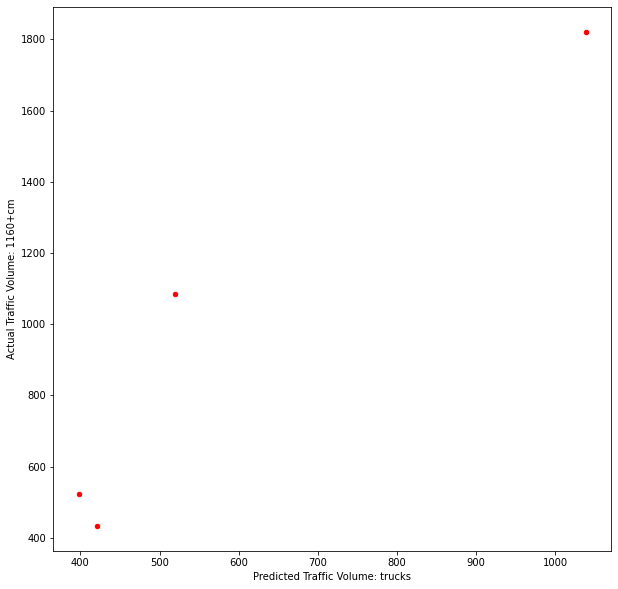

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
full_table.plot('all_vehicle_pred','total_volume', c='red', kind='scatter', ax=ax)
ax.set_xlabel('Predicted Traffic Volume: trucks')
ax.set_ylabel('Actual Traffic Volume: 1160+cm')
plt.show()

In [14]:
X = np.array(full_table['all_vehicle_pred']).reshape(-1,1)
y = np.array(full_table['total_volume']).reshape(-1,1)
theta = np.linalg.inv(X.T @ X) @ y.T @ X
theta = theta[0][0]

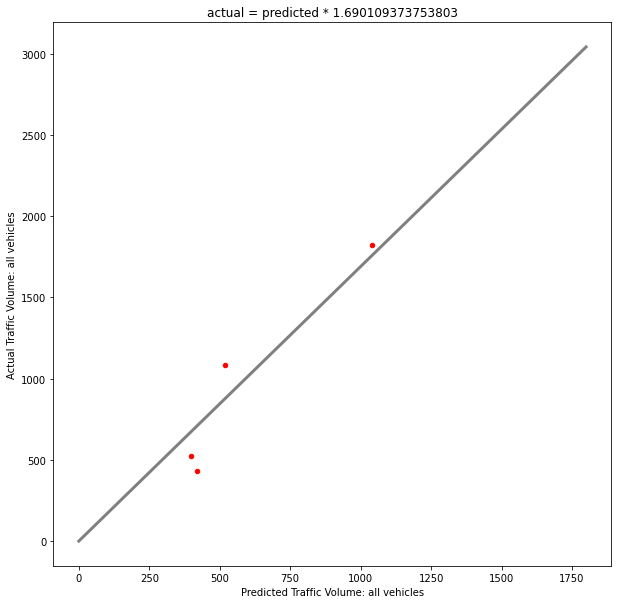

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot([0,1800],[0,1800*theta], lw=3, c='grey')
full_table.plot('all_vehicle_pred','total_volume', c='red', kind='scatter', ax=ax)
ax.set_xlabel('Predicted Traffic Volume: all vehicles')
ax.set_ylabel('Actual Traffic Volume: all vehicles')
ax.set_title(label=f"actual = predicted * {theta}")
plt.show()

### Mess

In [16]:
1/theta

0.5916776840181405